<a href="https://colab.research.google.com/github/RiaTopre/Cureya-Internship/blob/main/Cureya_Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Cureya Internship Week 5**

> ### Task Name: Stock Price Prediction - Apple
> #### ***Work by: Ria Topre***

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import Dense, LSTM
from keras.models import Sequential
import matplotlib.pyplot as plt

### **Loading Dataset**

In [3]:
df=web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.610315
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.678085
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.818838
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.952841
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.932299
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.799057
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.969292
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.879601


In [4]:
df.shape

(2003, 6)

## **Data Visualization**

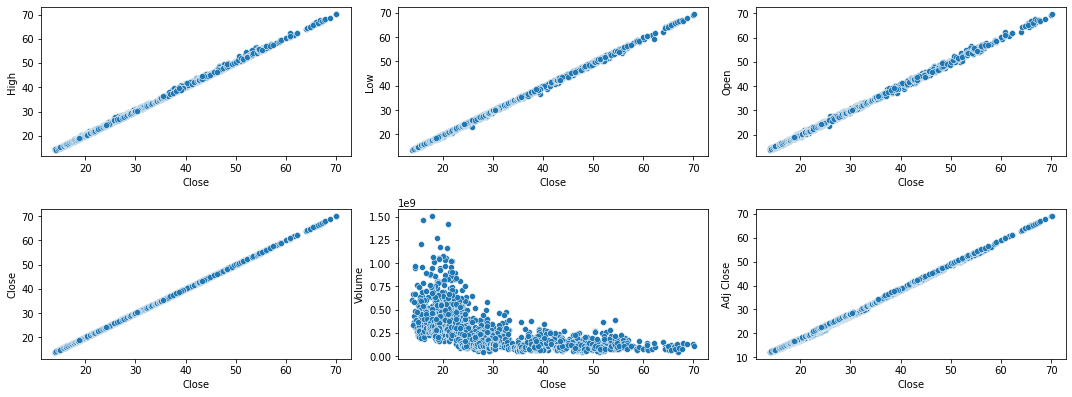

In [5]:
plt.figure(figsize = (15, 8))
plotnumber = 1
for column in df:
    if plotnumber<=7 :
        ax = plt.subplot(3, 3, plotnumber)
        sns.scatterplot(x = df['Close'], y = df[column])
    plotnumber += 1
plt.tight_layout()
plt.show()

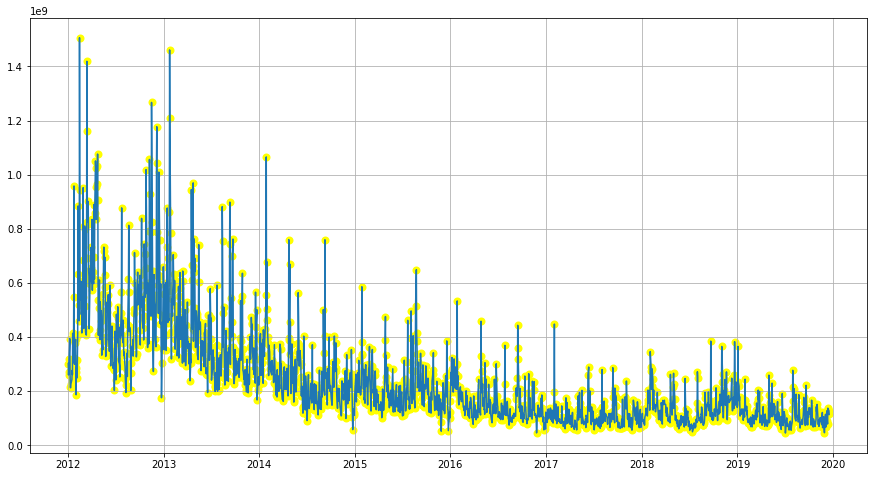

In [6]:
plt.figure(figsize=(15,8))
plt.scatter(df.index,df["Volume"],color="yellow",lw=2)
plt.plot(df.index,df["Volume"])
plt.grid(True)
plt.show()

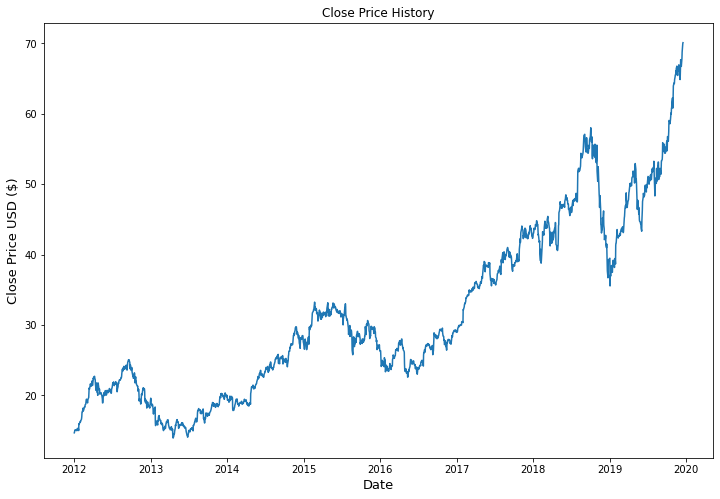

In [7]:
# Visualize the closing price history
plt.figure(figsize=(12,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=13)
plt.ylabel('Close Price USD ($)', fontsize=13)
plt.show()


-  Graph dipicts that Apple Company's stock price are increasing over the years. 





### Split dataset into Training & Testing

In [8]:
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8 )
training_data_len

1603

### Scaling the Data

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [10]:
train_data =scaled_data[0:training_data_len , :]
#Split the data into x_train & y_train
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]



In [11]:
# Convert x-train & y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(1543, 60)

In [12]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

### Predict the stock prices using following algorithm:

### **-  RNN**

In [13]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [14]:
# Compile the model
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


### **Training The Model**

In [16]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 40s 24ms/step - loss: 7.5036e-04


In [17]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [18]:
x_test = np.array(x_test)

In [19]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [20]:
# Get the model's predicted price values
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

### Evaluation Matrix

In [21]:
rmse = np.sqrt(((pred - y_test) ** 2).mean())
rmse

2.374446465958062



*   ## **Plot graph after prediction by using different colors to show predicted  stocks**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


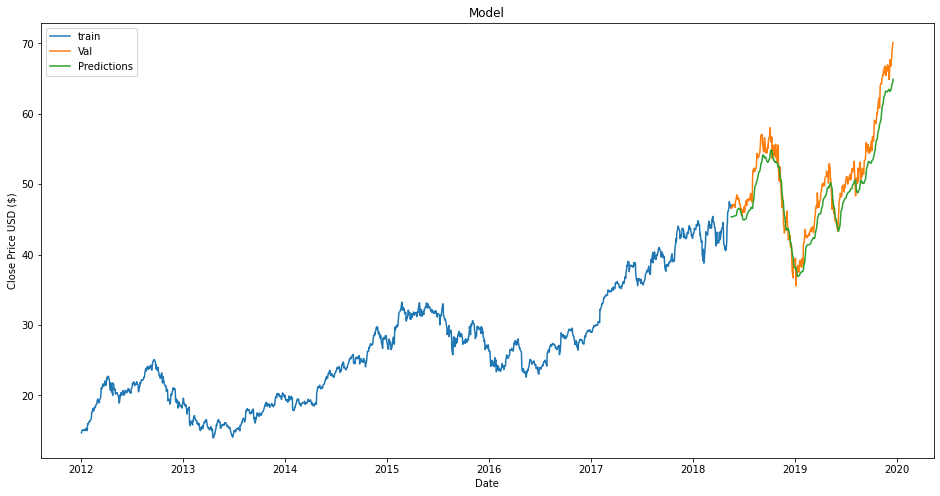

In [22]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['pred'] = pred
# Vsualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=10)
plt.ylabel('Close Price USD ($)', fontsize = 10)
plt.plot(train['Close'])
plt.plot(valid[['Close','pred']])
plt.legend(['train', 'Val', 'Predictions'], loc= 'upper left')
plt.show() 

- In Blue here is the data that the model was trained on.
- Orange colour  is the actual closing stock price values for rest of the days
- Green are the predictions that our model predicted the values to be
This graph states that our model predictions are pretty decent. 

In [23]:
# Show the Valid & Predicted price
valid

,Close,pred
Date,,
2018-05-17,46.747501,45.350307
2018-05-18,46.577499,45.393356
2018-05-21,46.907501,45.379055
2018-05-22,46.790001,45.378559
2018-05-23,47.090000,45.372280
...,...,...
2019-12-11,67.692497,63.698437
2019-12-12,67.864998,63.916039
2019-12-13,68.787498,64.145912
